In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from ex1 import train, evaluate, visualize_predictions, FashionMNISTModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

Using cuda device
cuda


In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [3]:
# Initialize model, loss, optimizer
model = FashionMNISTModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [4]:
train(model, train_loader, criterion, optimizer, epochs=50)

Epoch [1/50], Loss: 0.5017
Epoch [2/50], Loss: 0.3731
Epoch [3/50], Loss: 0.3334
Epoch [4/50], Loss: 0.3060
Epoch [5/50], Loss: 0.2888
Epoch [6/50], Loss: 0.2695
Epoch [7/50], Loss: 0.2570
Epoch [8/50], Loss: 0.2417
Epoch [9/50], Loss: 0.2301
Epoch [10/50], Loss: 0.2178
Epoch [11/50], Loss: 0.2090
Epoch [12/50], Loss: 0.1972
Epoch [13/50], Loss: 0.1897
Epoch [14/50], Loss: 0.1788
Epoch [15/50], Loss: 0.1714
Epoch [16/50], Loss: 0.1667
Epoch [17/50], Loss: 0.1562
Epoch [18/50], Loss: 0.1497


KeyboardInterrupt: 

Test Accuracy: 88.91%


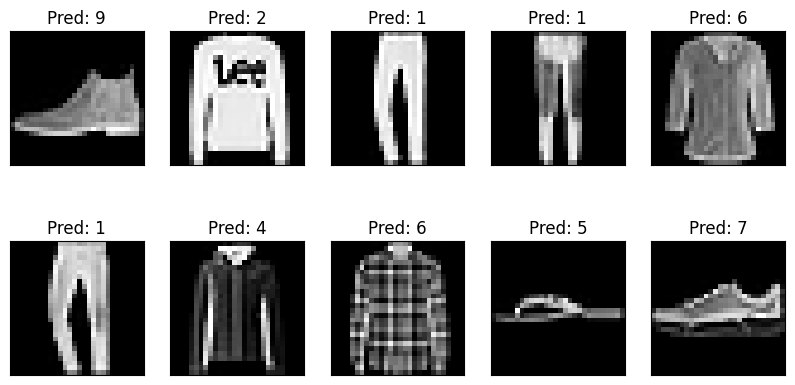

In [5]:
evaluate(model, test_loader)
visualize_predictions(model, test_loader)

In [6]:
torch.save(model.state_dict(), "fashion_mnist_model.pth")